# 1. load and understand the data

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [4]:
df = pd.read_csv("../Data/spam.csv", encoding='latin1')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df = df[['v1','v2']]

In [12]:
df.columns = ['label','text']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

# 2. Preprocess the Text Data

In [37]:
import string
import re
def clean_text(text):
    text = str(text).lower()

    #for removing punctuation
    text = text.translate(str.maketrans('','',string.punctuation))

    #lets remove num's
    text = re.sub(r'\d+','',text)
    return text   

In [38]:
df['clean_text'] = df['text'].apply(clean_text)

df[['text', 'clean_text']].head()

,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


# Text Vectorization + Model Training
we will use -
- CountVectorizer to convert text → numbers

- MultinomialNB (Naive Bayes) model

In [46]:
cv = CountVectorizer()
X = cv.fit_transform(df['clean_text'])

#encode ham - 0 and spam -1 
y=df['label'].map({'ham':0 , 'spam':1})

#splitting
X_train , X_test ,y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

#model training
model = MultinomialNB()
model.fit(X_train , y_train)

#prediction
y_pred = model.predict(X_test)

#evalutatee
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy score: {acc*100:.2f}%")
print("Classification Report:\n ",classification_report(y_test,y_pred))

Accuracy score: 97.04%
Classification Report:
                precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.88      0.91      0.89       150

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# Most Frequent Words in Spam Messages

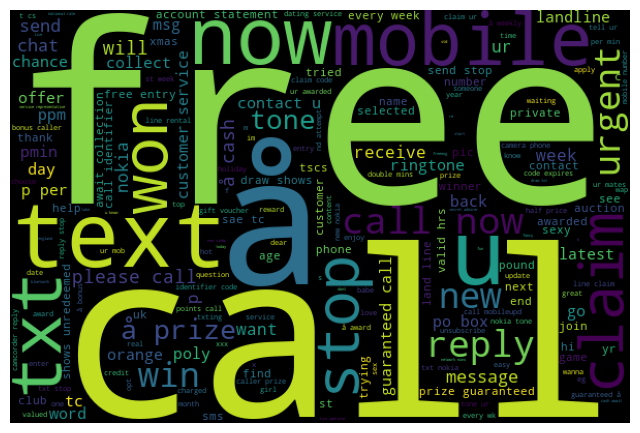

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_words = ' '.join(df[df['label']=='spam']['clean_text'])
wordcloud = WordCloud(width=600, height=400).generate(spam_words)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [55]:
import joblib
joblib.dump(model, '../models/spam_model.pkl')
joblib.dump(cv, '../models/vectorizer.pkl')

['../models/vectorizer.pkl']